# Time Series Predictions

In [34]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
# Import Dataset

cputrain = pd.read_csv('/workspaces/gustavolima-timeseries1/data/raw/main_cpu-train.csv')
cputest = pd.read_csv('/workspaces/gustavolima-timeseries1/data/raw/main_cpu-test.csv')

cputrain.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [47]:
cputrain.tail()

,cpu
datetime,
2017-01-28 04:37:00,1.45
2017-01-28 04:38:00,1.78
2017-01-28 04:39:00,1.77
2017-01-28 04:40:00,1.67
2017-01-28 04:41:00,1.67


In [36]:
# Check Dataframe Data Types
cputrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  600 non-null    object 
 1   cpu       600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


In [37]:
# Convert Train Dataset object to DateTime

cputrain['datetime'] = pd.to_datetime(cputrain['datetime'])
cputrain.set_index('datetime', inplace=True)

cputrain.head()

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


In [40]:
# Convert Test Dataset object to DateTime

cputest['datetime'] = pd.to_datetime(cputest['datetime'])
cputest.set_index('datetime', inplace=True)

cputest.head()

,cpu
datetime,
2017-01-28 04:42:00,1.71
2017-01-28 04:43:00,1.58
2017-01-28 04:44:00,1.86
2017-01-28 04:45:00,1.66
2017-01-28 04:46:00,1.61


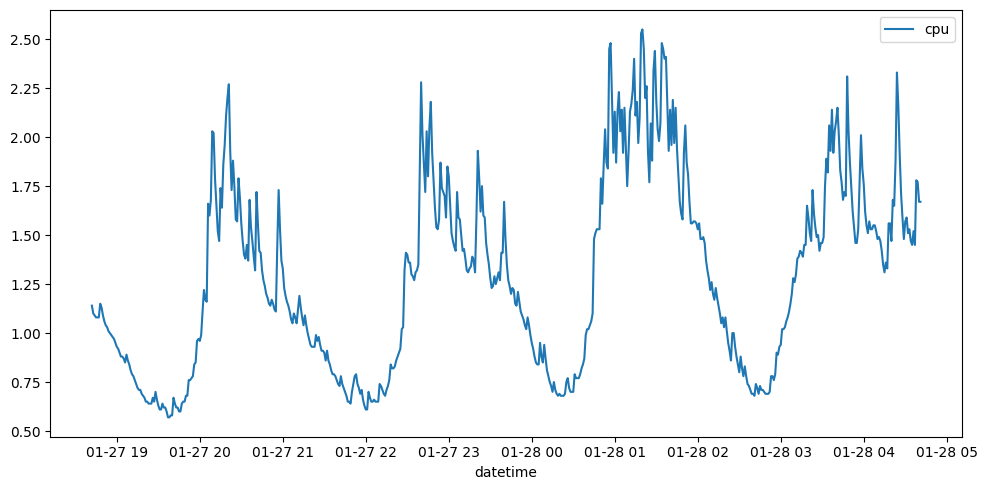

In [42]:
# Plot the Data
fig, axis = plt.subplots(figsize = (10, 5))

# Insert the Data
sns.lineplot(data = cputrain)

# Adjust Plot
plt.tight_layout()

# Plot
plt.show()

In [50]:
# Decompose the Time Series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(cputrain, period = 24)
decomposition

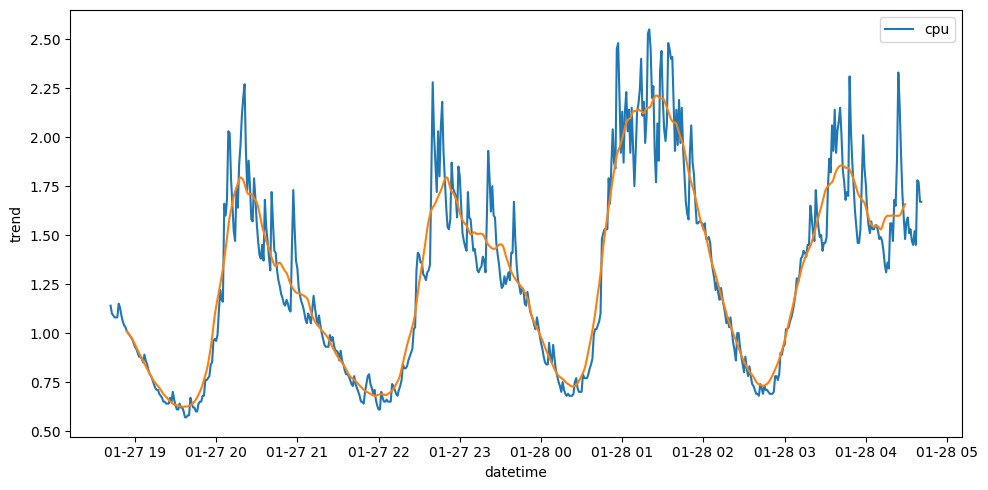

In [51]:
# Analysis the Trend
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = cputrain)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

The trend is not postive nor negative, in this case it's a flat trend.

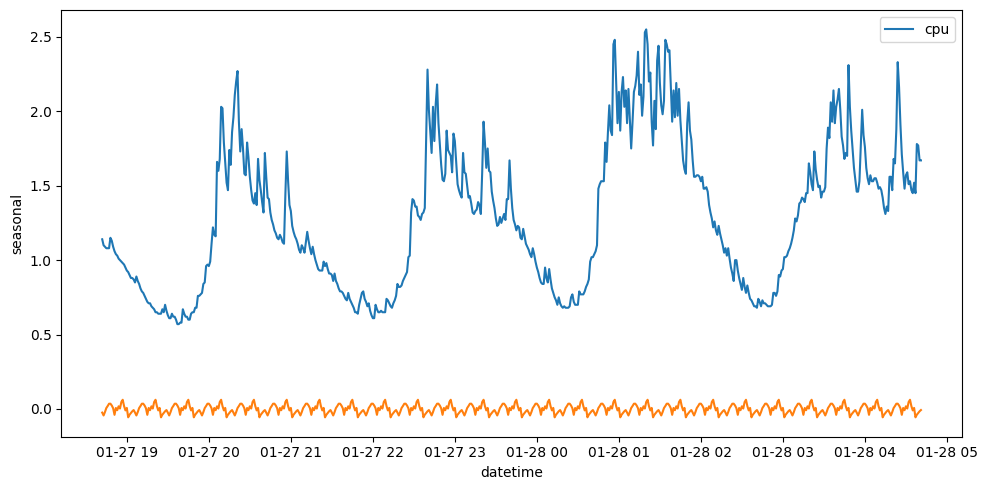

In [52]:
# Check The Seasonality
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = cputrain)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

By the naked eye, we can say that there is a Seasonality. But better to test it mathematically. 

In [53]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(cputrain)

Dickey-Fuller test results:


Test Statistic                  -3.421625
p-value                          0.010243
#Lags Used                      18.000000
Number of Observations Used    581.000000
Critical Value (1%)             -3.441655
Critical Value (5%)             -2.866527
Critical Value (10%)            -2.569426
dtype: float64

The Time Series is Seasonal, our p-value confirm the null hypothesis. 

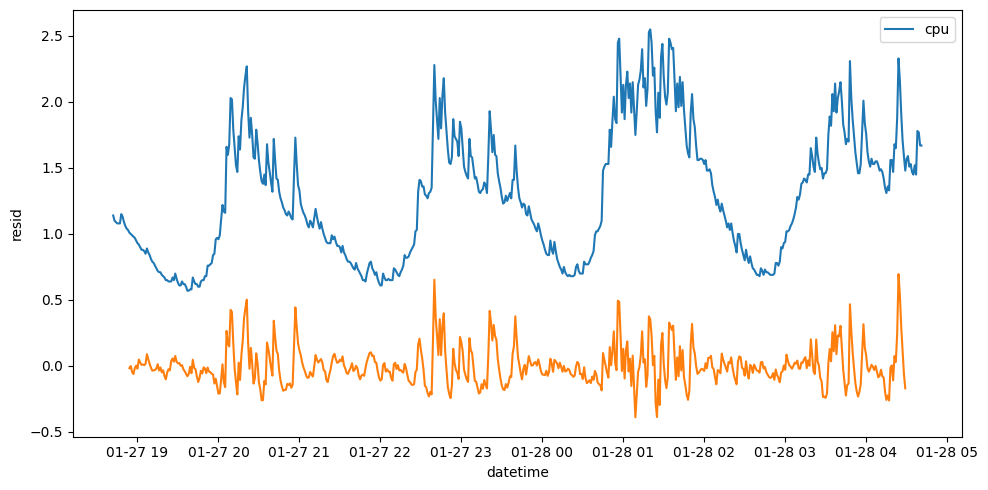

In [54]:
# Check the Variability of our Time Series
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = cputrain)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

Analysing the Variability, there is generalized noise in the data, which can make predictions harder. 

##### Check the Auto Correlation

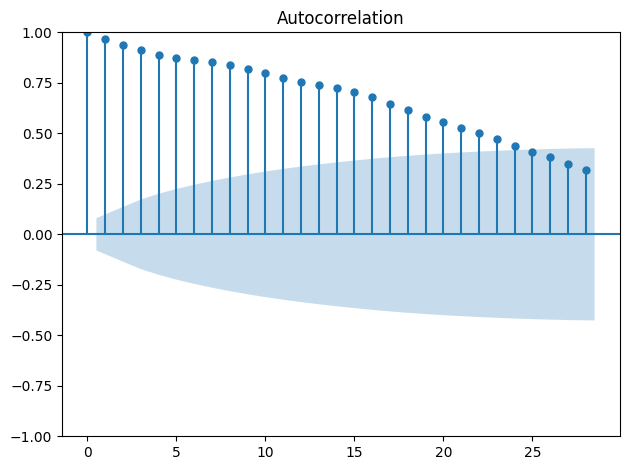

In [55]:
# Check the Auto Correlation of the Data
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(cputrain)

plt.tight_layout()

plt.show()

There's so much noice, that the correlation is getting weaker and weaker over time. 